In [ ]:
!pip install --upgrade seaborn==0.10.1
!pip install --upgrade scikit-learn==0.23.1
!pip install --upgrade matplotlib==3.2.0
!pip install --upgrade pandas==1.0.4
!pip install --upgrade qiskit==0.19.6 

# the output will be cleared after installation
from IPython.display import clear_output
clear_output()

In [ ]:
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.compiler import *

from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline

In [ ]:
def even_block(circuit, theta):
    
    circuit.rz(theta, range(4))
    
    for i in range(4):
        for j in range(i+1, 4):
            circuit.cz(i, j)
    
    return circuit

def odd_block(circuit, theta):
    
    circuit.rx(theta, range(4))
    
    return circuit

def single_layer(circuit, theta1, theta2):
    
    circuit = odd_block(circuit, theta2)
    circuit = even_block(circuit, theta1)
    circuit.barrier()
    
    return circuit

In [ ]:
def network(circuit, L, theta):
    
    for i in range(L):
        circuit = single_layer(circuit, theta[2*i], theta[2*i + 1])
    
    return circuit

In [ ]:
from qiskit.quantum_info import random_statevector
from qiskit import execute, Aer

def give_vector(circuit):
    
    backend = Aer.get_backend("statevector_simulator")
    job = execute(circuit ,backend = backend)
    statevector1 = job.result().get_statevector()
    
    return statevector1

In [ ]:
def cost(actual, prediction):
    
    ans1 = actual.data - prediction.data
    a1 = np.array(ans1)
    a2 = np.conj(a1)
    return float(a2.dot(a1))

In [ ]:
def give_output(theta, L):
    
    circuit = QuantumCircuit(4)
    circuit = network(circuit, L, theta)
    predictions = give_vector(circuit)
    
    return predictions

In [ ]:
epsilon = 0.0000000001

def gradient(theta, L, phi):
    
    grad = []
    for i in range(len(theta)):
        initial = theta[i]
        
        theta[i] = initial + epsilon
        pred = give_output(theta, L)
        diff1 = cost(phi, pred)
        
        theta[i] = initial - epsilon
        pred = give_output(theta, L)
        diff2 = cost(phi, pred)
        
        theta[i] = initial
        grady = (diff1 - diff2)/(2*epsilon)
        grad.append(float(grady))
        
    return grad

In [ ]:
learning_rate = 0.03

def backprop(theta, num, L, phi):
  curve = [] 
  maxiter = 0
  
  for i in range(num):
    maxiter = i  
    grad = gradient(theta, L, phi)
    for index in range(len(theta)):
      theta[index] = theta[index] - learning_rate*grad[index] 

    final = give_output(theta, L)
    value = cost(final, phi)
    print("cost after " + str(i) + "th iteration is " + str(value))
    curve.append(value)
    #if i > 10 and curve[i] - value < 0.00001:
      # break 
    if i > 10 and curve[i] < value and curve[i-1] < curve[i]:
      break  
  return theta , curve, value, maxiter

In [ ]:
def parameter_intialisation(L):
    np.random.seed(45)
    return np.random.rand(2*L)*2*np.pi

In [ ]:

L = 4

In [ ]:
theta = parameter_intialisation(L)

In [ ]:
phi = random_statevector(16, 69)
num = 150
print()
thet, curve, value, numiter = backprop(theta, num, L, phi)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


cost after 0th iteration is 1.5734552815361864
cost after 1th iteration is 1.5259684476389817
cost after 2th iteration is 1.5045719709433683
cost after 3th iteration is 1.4917907090398275
cost after 4th iteration is 1.4818888632338303
cost after 5th iteration is 1.473197413935584
cost after 6th iteration is 1.4652359918029065
cost after 7th iteration is 1.4578489125556413
cost after 8th iteration is 1.4509653429071203
cost after 9th iteration is 1.444535016782909
cost after 10th iteration is 1.4385122543355462
cost after 11th iteration is 1.4328523716801485
cost after 12th iteration is 1.4275109425030426
cost after 13th iteration is 1.4224442864893552
cost after 14th iteration is 1.4176095156165216
cost after 15th iteration is 1.4129647442821975
cost after 16th iteration is 1.4084694795997255
cost after 17th iteration is 1.4040844753950408
cost after 18th iteration is 1.399771853257415
cost after 19th iteration is 1.3954950565179804
cost after 20th iteration is 1.391218722828458
cost a

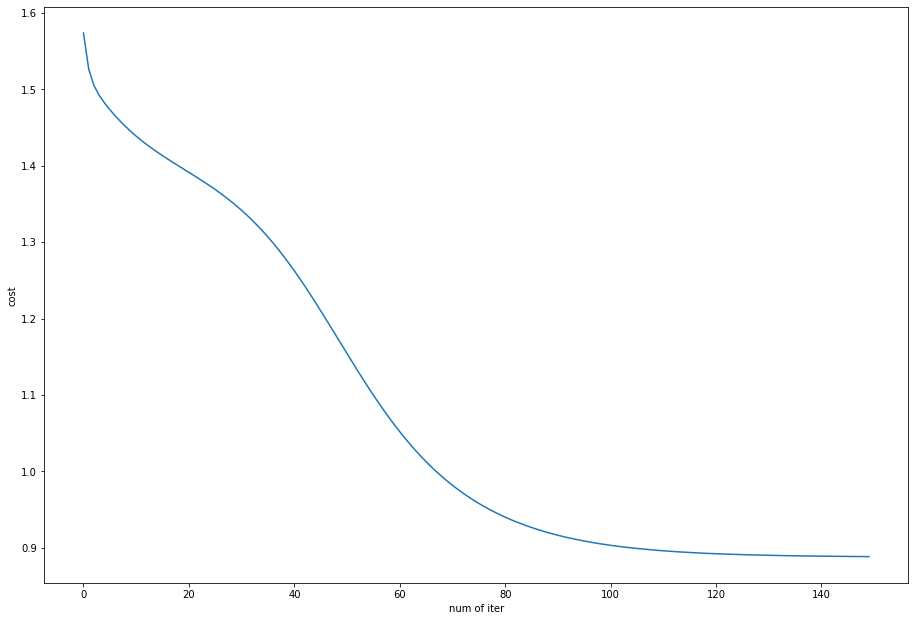

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
axis = fig.add_axes([0.0, 0.0, 2, 2])
axis.plot(range(numiter+1), curve)
axis.set_ylabel("cost")
axis.set_xlabel("num of iter")
plt.show()

In [ ]:
lister = range(1, 11)
final_cost = []
thet = []
curve = []
numit = []
num = 150
phi = random_statevector(16, 65)
for i in range(len(lister)):
    print("for the " + str(i) + "th iteration of L")
    l = lister[i]
    theta = parameter_intialisation(l)
    theta1, c1, cost1, numiter = backprop(theta, num, l, phi)
    thet.append(theta1)
    curve.append(c1)
    final_cost.append(cost1)
    numit.append(numiter)

for the 0th iteration of L
cost after 0th iteration is 1.8398432570634713
cost after 1th iteration is 1.8389539171268123
cost after 2th iteration is 1.8381958278478574
cost after 3th iteration is 1.837549276567675
cost after 4th iteration is 1.8369974296953104
cost after 5th iteration is 1.8365259650744141
cost after 6th iteration is 1.8361226857235349


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


cost after 7th iteration is 1.8357772032550441
cost after 8th iteration is 1.8354807314679726
cost after 9th iteration is 1.8352258092193448
cost after 10th iteration is 1.8350061382132257
cost after 11th iteration is 1.8348163617846667
cost after 12th iteration is 1.8346519336833604
cost after 13th iteration is 1.8345090370828196
cost after 14th iteration is 1.8343844384860633
cost after 15th iteration is 1.8342753751543925
cost after 16th iteration is 1.8341795493182742
cost after 17th iteration is 1.8340949766692962
cost after 18th iteration is 1.8340200210784667
cost after 19th iteration is 1.8339532706767345
cost after 20th iteration is 1.8338935362098983
cost after 21th iteration is 1.8338398086949461
cost after 22th iteration is 1.8337912486546455
cost after 23th iteration is 1.8337471243930965
cost after 24th iteration is 1.8337068220348558
cost after 25th iteration is 1.833669827737715
cost after 26th iteration is 1.83363571454358
cost after 27th iteration is 1.833604099619796

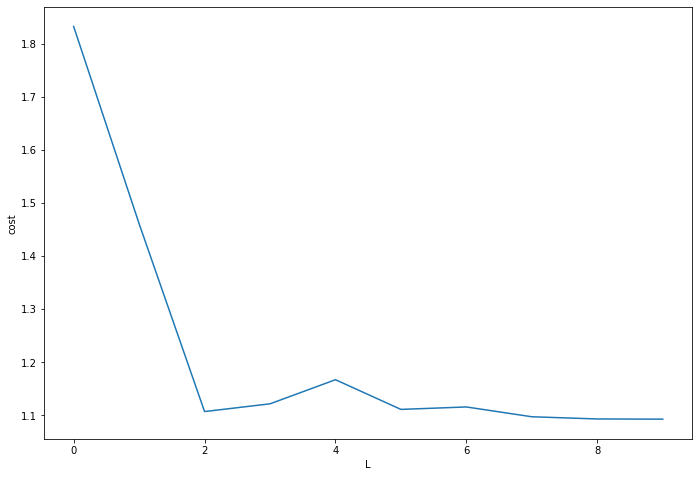

In [ ]:
fig = plt.figure()
axis = fig.add_axes([0.0, 0.0, 1.5, 1.5])
axis.plot(range(len(lister)), final_cost)
axis.set_ylabel("cost")
axis.set_xlabel("L")
plt.show()

ValueError: ignored

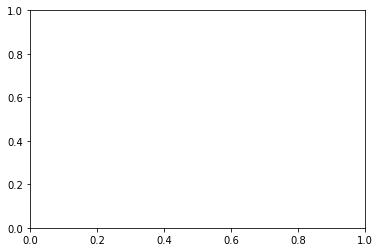

In [ ]:
import time
for i in range(len(lister)):
        number = curve[i: i+num]
        plt.plot(range(numit[i]+ 1), number)
        plt.show()
        time.sleep(5)